Importing necessary libraries for data preprosessing, visualising

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline


In [6]:
# importing dataset and printing first 5 rows
df = pd.read_csv(r'C:\Users\ASUS\Documents\Python\FYP\data.csv' , encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
# naming the column for later process and printing column names
df.columns=[ "target","ids","date", "flag","user","text"]
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [8]:
# this funvti removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [9]:
# passing the text column into the function and saving into new column 'clean_tweet'
# printing the first 5 rows
df['clean_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
df['clean_tweet'].head()

0    is upset that he can't update his Facebook by ...
1     I dived many times for the ball. Managed to s...
2      my whole body feels itchy and like its on fire 
3     no, it's not behaving at all. i'm mad. why am...
4                                  not the whole crew 
Name: clean_tweet, dtype: object

In [10]:
# Removing Punctuations, Numbers, and Special Characters
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df['clean_tweet'].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2804\785911917.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


0    is upset that he can t update his Facebook by ...
1     I dived many times for the ball  Managed to s...
2      my whole body feels itchy and like its on fire 
3     no  it s not behaving at all  i m mad  why am...
4                                  not the whole crew 
Name: clean_tweet, dtype: object

In [11]:
# remove short words
# For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df['clean_tweet'].head()

0    upset that update Facebook texting might resul...
1       dived many times ball Managed save rest bounds
2                     whole body feels itchy like fire
3                     behaving here because over there
4                                           whole crew
Name: clean_tweet, dtype: object

In [12]:
# Now we will tokenize all the cleaned tweets in our dataset. 
# Tokens are individual terms or words, and tokenization 
# is the process of splitting a string of text into tokens.


tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [upset, that, update, Facebook, texting, might...
1    [dived, many, times, ball, Managed, save, rest...
2              [whole, body, feels, itchy, like, fire]
3               [behaving, here, because, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [13]:
# Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [upset, that, updat, facebook, text, might, re...
1    [dive, mani, time, ball, manag, save, rest, bo...
2               [whole, bodi, feel, itchi, like, fire]
3                   [behav, here, becaus, over, there]
4                                        [whole, crew]
Name: clean_tweet, dtype: object

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df['clean_tweet'].head()

0    upset that updat facebook text might result sc...
1            dive mani time ball manag save rest bound
2                      whole bodi feel itchi like fire
3                         behav here becaus over there
4                                           whole crew
Name: clean_tweet, dtype: object

Importing Necessary Libraries for Wordcloud visualisation

In [17]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

Visualising Most Frequent words, Most Frequent Positive words and Most Frequent Negative words

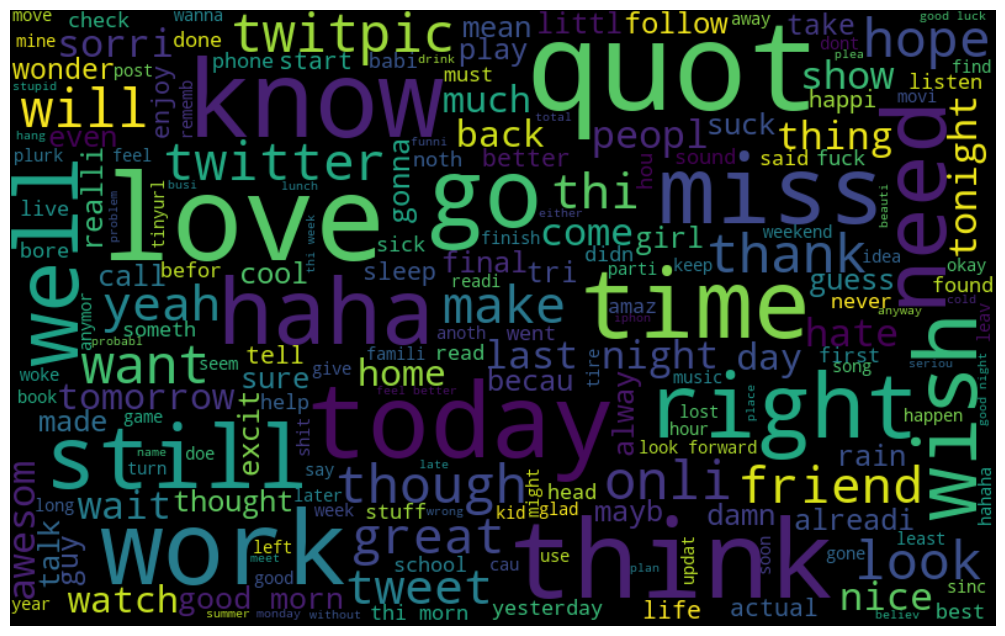

In [15]:
# visualize the frequent words with WORDCLOUD
all_words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

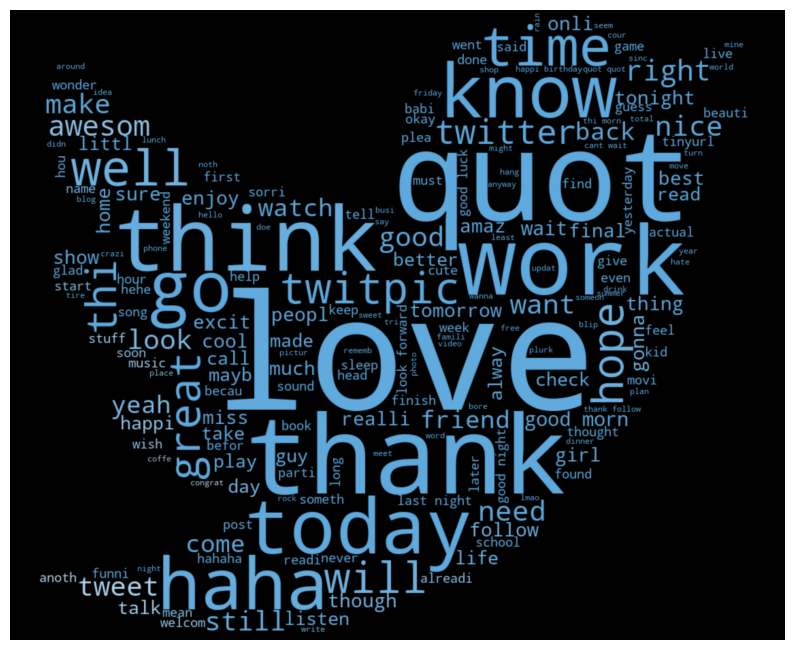

In [18]:
# frequent words visualization for positive words
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
all_pos_words = " ".join([sentence for sentence in df['clean_tweet'][df['target']==4]])
image_colors = ImageColorGenerator(Mask)

wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_pos_words)
# plot the graph
plt.figure(figsize=(10,28))
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="gaussian")
plt.axis('off')
plt.show()

(-0.5, 1138.5, 925.5, -0.5)

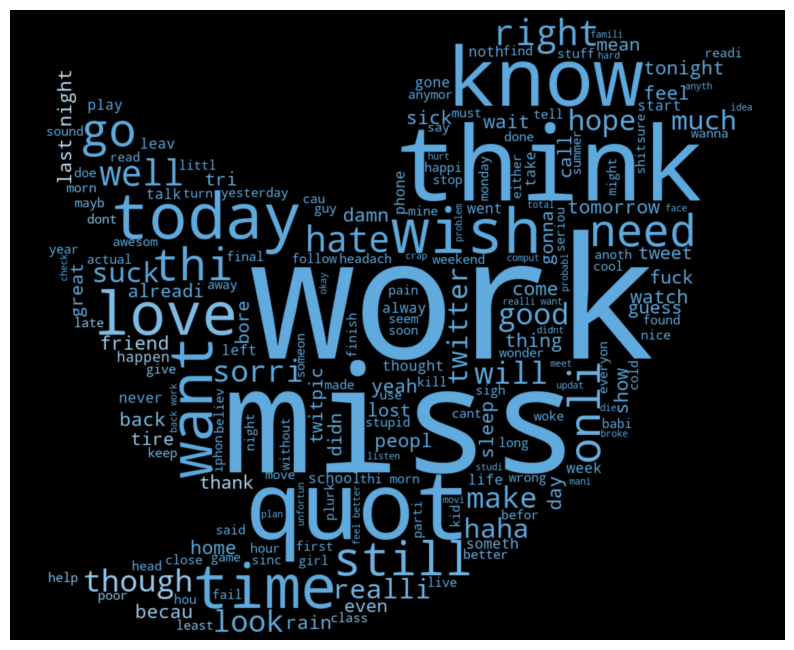

In [19]:
# frequent words visualization for negative words
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
all_neg_words = " ".join([sentence for sentence in df['clean_tweet'][df['target']==0]])
image_colors = ImageColorGenerator(Mask)

wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_neg_words)
# plot the graph
plt.figure(figsize=(10,28))
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="gaussian")
plt.axis('off')